In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df_raw = pd.read_csv('E:/Edureka_Python-Course/Data Sources/Day_14/glass.csv')

In [3]:
df_raw.head().transpose()

,0,1,2,3,4
RI,1.52101,1.51761,1.51618,1.51766,1.51742
Na,13.64000,13.89000,13.53000,13.21000,13.27000
Mg,4.49000,3.60000,3.55000,3.69000,3.62000
Al,1.10000,1.36000,1.54000,1.29000,1.24000
Si,71.78000,72.73000,72.99000,72.61000,73.08000
K,0.06000,0.48000,0.39000,0.57000,0.55000
Ca,8.75000,7.83000,7.78000,8.22000,8.07000
Ba,0.00000,0.00000,0.00000,0.00000,0.00000
Fe,0.00000,0.00000,0.00000,0.00000,0.00000
Type,1.00000,1.00000,1.00000,1.00000,1.00000


In [4]:
df_raw.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [5]:
df_raw.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<BarContainer object of 9 artists>
<BarContainer object of 9 artists>
<BarContainer object of 9 artists>
<BarContainer object of 9 artists>
<BarContainer object of 9 artists>
<BarContainer object of 9 artists>


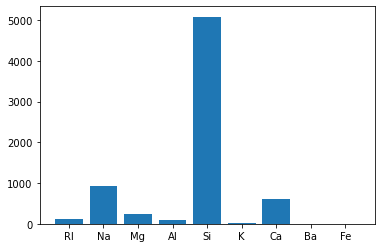

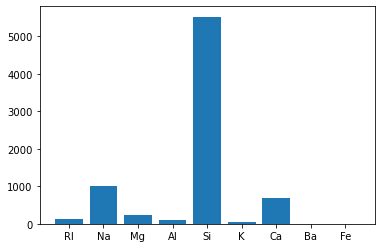

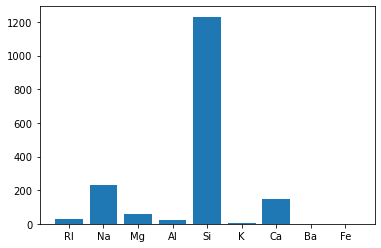

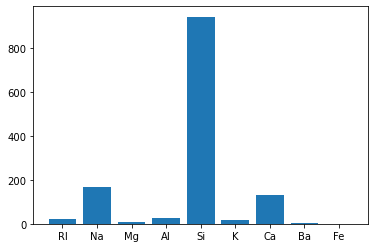

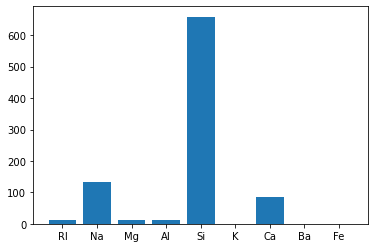

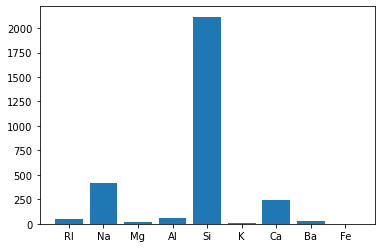

In [7]:
bar_x = df_raw.Type.unique()
bar_heights = []

for typ in bar_x:
    fig, ax = plt.subplots()
    type_df = df_raw[df_raw.Type == typ]
    xs = type_df.columns.unique()[:-1]
    heights = [sum(type_df[col]) for col in xs]
    print(ax.bar(xs,heights))
    

In [8]:
train_x, test_x, train_y, test_y = train_test_split(
    df_raw.drop('Type', axis=1) , df_raw.Type,
    random_state=50,
)

train_x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
146,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00
204,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00
...,...,...,...,...,...,...,...,...,...
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00


In [48]:
??RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Source:        
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:

In [27]:
model_decisionTree = DecisionTreeClassifier()
#model_decisionTree.fit(train_x, train_y )
#accuracy_score(test_y, model_decisionTree.predict(test_x))

In [54]:
prm_grid = {
    'n_estimators' : [1,5,25,50]+list(range(100,501,100))
}

In [30]:
cv_3fold = KFold(n_splits=3)
scores_3fold = cross_val_score(model_decisionTree, df_raw.drop('Type', axis=1), df_raw.Type,
                               scoring='accuracy', cv=cv_3fold, n_jobs=-1)
np.mean(scores_3fold)

0.07035732916014606

In [34]:
model_RdForest = RandomForestClassifier()

In [62]:
gsCSV = GridSearchCV(
                     estimator=model_RdForest,
                     param_grid=prm_grid,
                     cv=cv_10fold
                     
        )
gsCSV

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 25, 50, 100, 200, 300, 400,
                                          500]})

In [63]:
gsCSV.fit(df_raw.drop('Type', axis=1), df_raw.Type)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 25, 50, 100, 200, 300, 400,
                                          500]})

In [64]:
gsCSV.best_estimator_

RandomForestClassifier(n_estimators=400)